### **Cells Counting in channel 2 (green modality) Images Using Cellpose 2.0**

In [ ]:
!pip install cellpose
!pip install torch torchvision torchaudio

#Fix opencv error: ImportError: cannot import name '_registerMatType' from 'cv2.cv2'
!pip install "opencv-python-headless<4.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.0/205.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [ ]:
import cv2
import matplotlib.pyplot as plt
from cellpose import models,core
import numpy as np
import os
from cellpose import io
import random

**Creating images folder (copy all images inside it)**

In [ ]:
images_folder = '/content/cells images'
if os.path.exists(images_folder):
  pass
else:
  os.makedirs(images_folder)
  pass

In [ ]:
images_names_list =  os.listdir(images_folder)
images_path_list = []
for image_name in images_names_list:
  if image_name.split(".")[-1] == 'jpg':
    image_path = os.path.join(images_folder,image_name)
    images_path_list.append(image_path)
  pass

In [ ]:
images_path_list

['/content/cells images/Image_CH2 2.jpg',
 '/content/cells images/Image_CH2 14.jpg',
 '/content/cells images/Image_CH2 4.jpg',
 '/content/cells images/Image_CH2 13.jpg',
 '/content/cells images/Image_CH2 7.jpg',
 '/content/cells images/Image_CH2 8.jpg',
 '/content/cells images/Image_CH2 3.jpg',
 '/content/cells images/Image_CH2 6.jpg',
 '/content/cells images/Image_CH2 11.jpg',
 '/content/cells images/Image_CH2 5.jpg',
 '/content/cells images/Image_CH2 1.jpg',
 '/content/cells images/Image_CH2 10.jpg',
 '/content/cells images/Image_CH2 15.jpg',
 '/content/cells images/Image_CH2 9.jpg',
 '/content/cells images/Image_CH2 12.jpg']

In [ ]:
images_list = []
for cells_image_path in images_path_list:
  image = cv2.imread(cells_image_path)
  images_list.append(image)
  pass

In [ ]:
len(images_list)

15

Image: Image_CH2 12.jpg


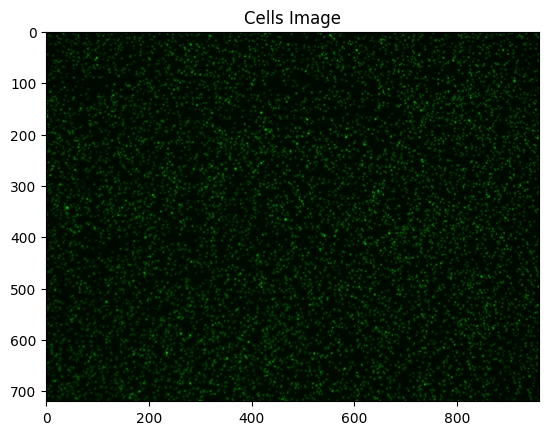

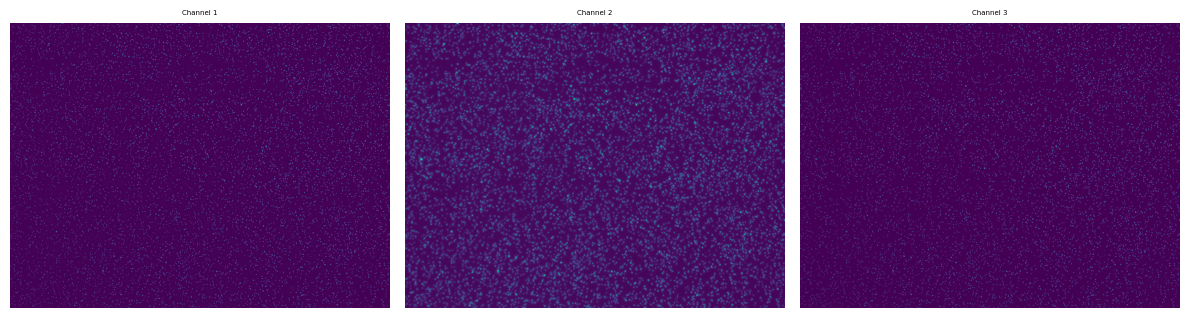

In [ ]:
random_index = random.choice(range(len(images_list)))

image_name = images_path_list[random_index].split('/')[-1]
no_of_channels = images_list[random_index].shape[-1]

print("Image: %s" %(image_name))

plt.title("Cells Image")
plt.imshow(images_list[random_index])
plt.show()

fig, axs = plt.subplots(1, no_of_channels,figsize=(12,5))

for channel in range(no_of_channels):
    axs[channel].imshow(images_list[random_index][:,:,channel])
    axs[channel].set_title('Channel '+str(channel+1),size=5)
    axs[channel].axis('off')
fig.tight_layout()

In [ ]:
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  print(BOLD+'You do not have GPU access.'+END)
  use_GPU=False
else:
  print(BOLD+"You have access to the GPU."+END)
  use_GPU=True

You have access to the GPU.


**Selecting Necessary Hyperparameters and Pretrained CellPose Model**

In [ ]:
models_list = ["cyto", "nuclei", "cyto2", "tissuenet", "livecell"]

selected_model = models_list[1]
               #R,G,B
img_channels = [1,2,3]
cytoplasm_channel = int(img_channels[1])
nuclear_channel = int(img_channels[1])

#If you choose cyto or tissuenet model then keep nuclear_channel True otherwise for nuclei model keep it false
Use_nuclear_channel = False

# channels = [cytoplasm, nucleus]
if Use_nuclear_channel:
  channels=[cytoplasm_channel,nuclear_channel]
else:
  channels=[cytoplasm_channel,0]

Cell_Probability_Threshold_list = list(range(-6,7,1))
flow_threshold_list = list(map(lambda x:x/10.0, range(1,12,1)))

Cell_Probability_Threshold = Cell_Probability_Threshold_list[0]
flow_threshold = flow_threshold_list[-1]

##### Loading Cellpose Model API function

model = models.Cellpose(gpu=use_GPU, model_type=selected_model)

In [ ]:
print('Cell Probability Threshold range -->',Cell_Probability_Threshold_list)
print('Flow Threshold range -->',flow_threshold_list)

Cell Probability Threshold range --> [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
Flow Threshold range --> [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]


**Cellpose Hyperparameters**

In [ ]:
print("Selected Model : '",selected_model,"'\n")
print("Image Channel : ", channels)
print("Cell Probability Threshold : ", Cell_Probability_Threshold)
print("Flow Threshold : ", flow_threshold)

Selected Model : ' nuclei '

Image Channel :  [2, 0]
Cell Probability Threshold :  -6
Flow Threshold :  1.1


**Predicting Segmentation mask using Cellpose selected Model**

In [ ]:
sample_image = images_list[random_index]
masks, flows, styles, diams = model.eval(sample_image,
                                         diameter=False,
                                         flow_threshold=flow_threshold,
                                         cellprob_threshold=Cell_Probability_Threshold,
                                         channels=channels)

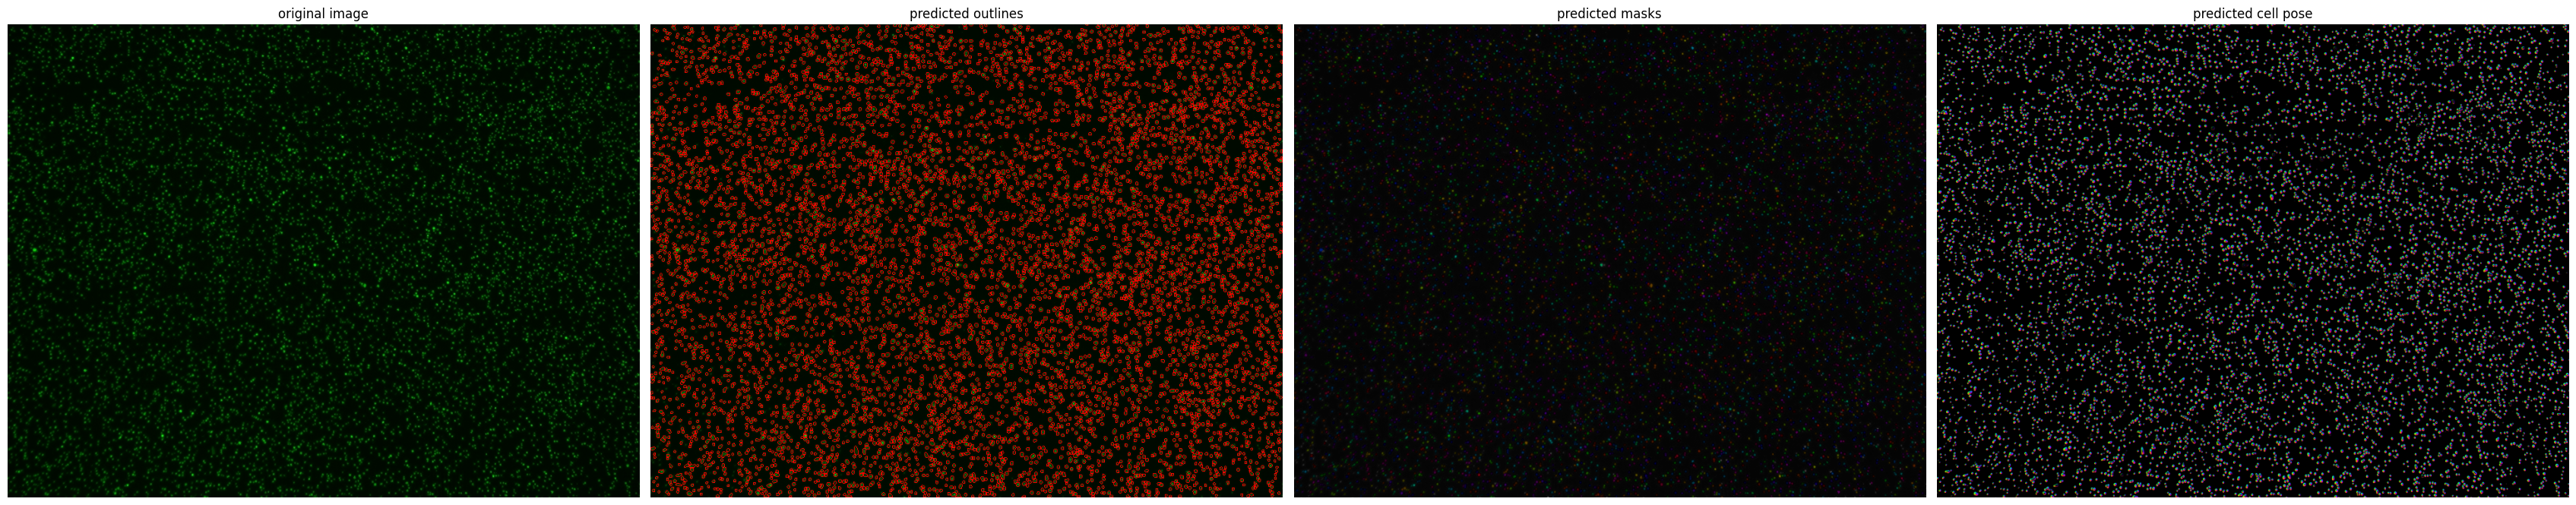

In [ ]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(24,8))
plot.show_segmentation(fig, sample_image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

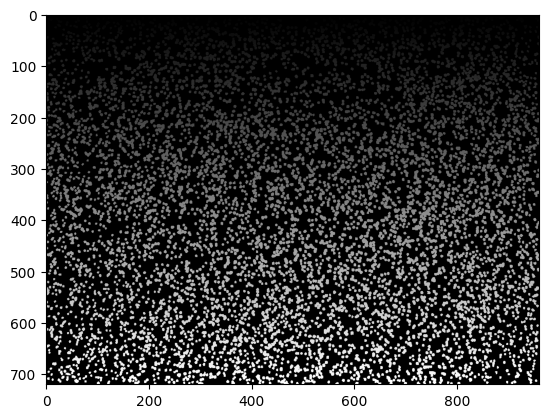

In [ ]:
plt.imshow(masks,cmap='gray')

**Manual Thresholding by transforming all values greater than 1 to value 1 (We can apply otsu Threshold as well as it will work the same)**

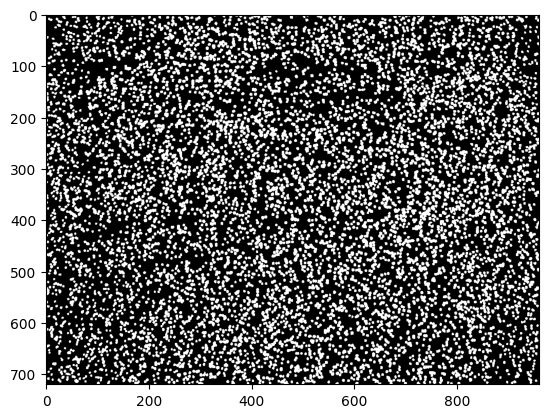

In [ ]:
segmentation_mask = masks.copy()
segmentation_mask[segmentation_mask > 0] = 1
plt.imshow(segmentation_mask,cmap='gray')

**Applying Morphological Operation**

In [ ]:
segmentation_mask = np.uint8(segmentation_mask)

# Morphological Operation erosion  (Its optional to separate the closed cells pixels)
kernel = np.ones((2,2),np.uint8)
#segmentation_mask = cv2.erode(segmentation_mask,kernel,iterations = 1)

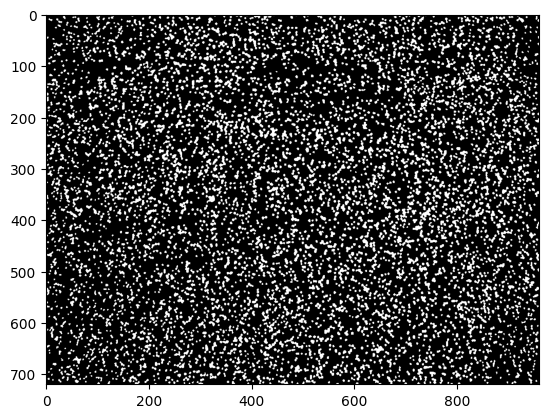

In [ ]:
plt.imshow(segmentation_mask,cmap='gray')

**Applying Connecting Components Labeling Method to count cells pixles blobs**

In [ ]:
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(segmentation_mask,
                                            4,
                                            cv2.CV_32S)

(totalLabels, label_ids, values, centroid) = analysis

In [ ]:
new_img = segmentation_mask.copy()
new_img = new_img * 255
# new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)

for i in range(1,totalLabels):

    # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    # Now extract the coordinate points
    x = values[i, cv2.CC_STAT_LEFT]
    y = values[i, cv2.CC_STAT_TOP]
    w = values[i, cv2.CC_STAT_WIDTH]
    h = values[i, cv2.CC_STAT_HEIGHT]

    #Certer points of cell
    (X, Y) = centroid[i]
    # cv2.circle(new_img, (int(X),
    #                      int(Y)),
    #            2, (133, 217, 234), -1)

    cv2.circle(new_img, (int(X),
                         int(Y)),
               2, (255, 0, 0), -1)

    # cv2.putText(new_img,
    #             str(i),
    #             (x, y - 3),
    #             cv2.FONT_HERSHEY_SIMPLEX,
    #             0.25,
    #             (36, 255, 12),
    #             1)

    #break
    pass

Total Cells Count ==>  4248 



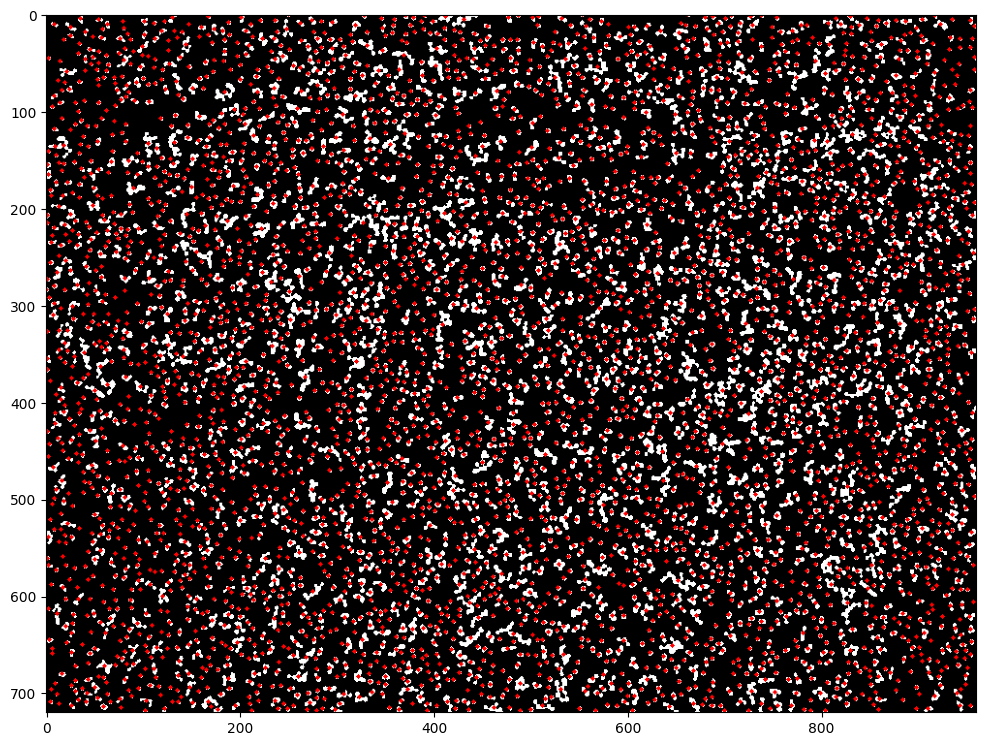

In [ ]:
print("Total Cells Count ==> ", totalLabels,"\n")
plt.figure(figsize =(12, 12))
plt.imshow(new_img)